# Yodapy Cloud Data Example

## Inilization

To access the OOI API, credentials need to be set. In order to set this up, switch to the python environment that contains yodapy and then fire up python.

```bash
$ python
```

Within the python console, set your credentials.

```python
from yodapy.utils.creds import set_credentials_file
set_credentials_file(data_source='ooi', username='Your OOI username', token='Your OOI token')
```

The initialization step places a special .yodapy/.credentials file in your home directory. Your ~/.yodapy/.credentials file should look something like this

```json
{"ooi": {"username": "Your OOI username", "api_key": "Your OOI token"}}
```

## Getting started with yodapy

First we need to import all the necessary packages to retrieve and visualize some data from OOI. `yodapy` provides easy access to OOI by having an easy to use interface to search through available data in OOI system and retrieve the data in the form of xarray dataset.

In [1]:
from yodapy.datasources import OOI

The `cloud_source` argument is a flag for yodapy to retrieve the data from the cloud copy rather than OOI UFrame system.

In [2]:
ooi = OOI(cloud_source=True)

CAVA team have not included everything within the OOI system. To see which sites we currently have, we provided `cava_sites` attribute with `in_progress_status`. If `in_progress_status` is `True, this indicate that we are still in process of integrating that site.

In [3]:
ooi.cava_sites

,reference_designator,site_name,site_url,site_area,wp_mapping,map_icon_mapping,in_progress_status
0,RS01SBPS,Oregon Slope Base Shallow Profiler,/research-sites/oregon-slope-base/,Oregon Slope Base,518,shallow-profiler,False
1,CE04OSPS,Oregon Offshore Shallow Profiler,/research-sites/oregon-offshore/,Oregon Offshore,518,shallow-profiler,False
2,RS03AXPS,Axial Base Shallow Profiler,/research-sites/axial-base/,Axial Base,518,shallow-profiler,False
3,CE02SHBP,Oregon Shelf Cabled Benthic Experiment Package,/research-sites/oregon-shelf/,Oregon Shelf,512,low-power-jbox,False
4,CE04OSBP,Oregon Offshore Cabled Benthic Experiment Package,/research-sites/oregon-offshore/,Oregon Offshore,512,low-power-jbox,False
5,RS01SLBS,Oregon Slope Base Seafloor,/research-sites/oregon-slope-base/,Oregon Slope Base,512,low-power-jbox,False
6,RS03ASHS,ASHES Vent Field,/research-sites/axial-caldera/ashes/,Axial Caldera,512,medium-power-jbox,False
7,RS03AXBS,Axial Base Seafloor,/research-sites/axial-base/,Axial Base,512,low-power-jbox,False
8,RS01SBPD,Oregon Slope Base Deep Profiler,/research-sites/oregon-slope-base/,Oregon Slope Base,516,deep-profiler,True
9,RS01SUM1,Southern Hydrate Summit 2 Seafloor,/research-sites/southern-hydrate-ridge/,Southern Hydrate Ridge,429,low-power-jbox,True


The listing of instruments that we have can be found under `cava_instruments`

In [4]:
ooi.cava_instruments

,reference_designator,instrument_name,formal_name,instrument_url
0,2A-CTDPFA102,CTD-O,Conductivity-Temperature-Depth,/instruments/ctd-conductivity-temperature-depth/
1,2A-CTDPFA107,CTD-O,Conductivity-Temperature-Depth,/instruments/ctd-conductivity-temperature-depth/
2,2A-CTDPFA302,CTD-O,Conductivity-Temperature-Depth,/instruments/ctd-conductivity-temperature-depth/
3,2B-PHSENA108,pH,pH Sensor,/instruments/ph/
4,2D-PHSENA101,pH,pH Sensor,/instruments/ph/
5,2D-PHSENA301,pH,pH Sensor,/instruments/ph/
6,3A-FLORTD101,Fluorometer,Fluorometer (CDOM),/instruments/fluorometer/
7,3A-FLORTD104,Fluorometer,Fluorometer (CDOM),/instruments/fluorometer/
8,3A-FLORTD301,Fluorometer,Fluorometer (CDOM),/instruments/fluorometer/
9,3C-PARADA101,Photosynthetically Available Radiation,Photosynthetically Available Radiation (PAR) S...,/instruments/photosynthetically-active-radiation/


The search allows us to search all of OOI system for what we want. If `cloud_source` flag is on however, you will only be able to retrieve actual data within CAVA system not OOI.

In [5]:
ooi.search(region='cabled', site='oregon slope base shallow profiler', instrument='CTD')

<Data Source: OOI (2 Instrument Streams)>

The `instruments` attribute is a listing of the data that will be fetched.

In [6]:
ooi.instruments

,array_name,site_name,infrastructure_name,instrument_name,stream_method,stream_rd
0,Cabled Continental Margin (Cabled Array),Oregon Slope Base Shallow Profiler Mooring,200m Platform (PC01A),CTD,streamed,ctdpf_optode_sample
1,Cabled Continental Margin (Cabled Array),Oregon Slope Base Shallow Profiler Mooring,Shallow Profiler (SF01A),CTD,streamed,ctdpf_sbe43_sample


In [7]:
# This example is designed to showcase basic data download
# over the time period of the 2017 solar eclipse

stdt = '2017-08-20'
enddt = '2017-08-23'

req_asset = ooi.request_data(
    begin_date=stdt,
    end_date=enddt
)

The `raw` function shows the list of zarr files fetched.

In [8]:
req_asset.raw()

[                                                   uri       time
 810  io2data/data/RS01SBPS-SF01A-2A-CTDPFA102-strea... 2017-08-20
 811  io2data/data/RS01SBPS-SF01A-2A-CTDPFA102-strea... 2017-08-21
 812  io2data/data/RS01SBPS-SF01A-2A-CTDPFA102-strea... 2017-08-22
 813  io2data/data/RS01SBPS-SF01A-2A-CTDPFA102-strea... 2017-08-23,
                                                    uri       time
 995  io2data/data/RS01SBPS-PC01A-4A-CTDPFA103-strea... 2017-08-20
 996  io2data/data/RS01SBPS-PC01A-4A-CTDPFA103-strea... 2017-08-21
 997  io2data/data/RS01SBPS-PC01A-4A-CTDPFA103-strea... 2017-08-22
 998  io2data/data/RS01SBPS-PC01A-4A-CTDPFA103-strea... 2017-08-23]

In [9]:
# to get the actual data in list of xarray datasets
ds_list = ooi.to_xarray()

In [10]:
ds_list

[<xarray.Dataset>
 Dimensions:                                 (time: 259194)
 Coordinates:
   * time                                    (time) datetime64[ns] 2017-08-20T00:00:00.731864576 ... 2017-08-22T23:59:59.926493184
     lat                                     (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
     lon                                     (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
     seawater_pressure                       (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
 Data variables:
     conductivity                            (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
     corrected_dissolved_oxygen              (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
     corrected_dissolved_oxygen_qc_executed  (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
     corrected_dissolved_oxygen_qc_results   (time) float64 dask.array<shape=(259194,), chunksize=(10000,)>
    

In [11]:
import xarray as xr
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
from yodapy.utils.parser import seconds_to_date

In [18]:
# Plot a simple timeseries of temperature, and PSU vs. pressure
ds = ds_list[0]

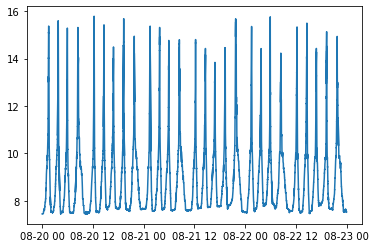

In [19]:
# pull out values from the xarray structure
pressure = ds['seawater_pressure'].data
temperature = ds['seawater_temperature'].data
psu = ds['practical_salinity'].data
ds_time = ds['time'].data

# quick and dirty timeseries plot of temperature for sanity check
plt.plot(ds_time,temperature)
plt.show()

/opt/conda/envs/yodapydev/lib/python3.6/site-packages/dask/array/core.py:1260: FutureWarning: The `numpy.shape` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
/opt/conda/envs/yodapydev/lib/python3.6/site-packages/dask/array/core.py:1260: FutureWarning: The `numpy.shape` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,


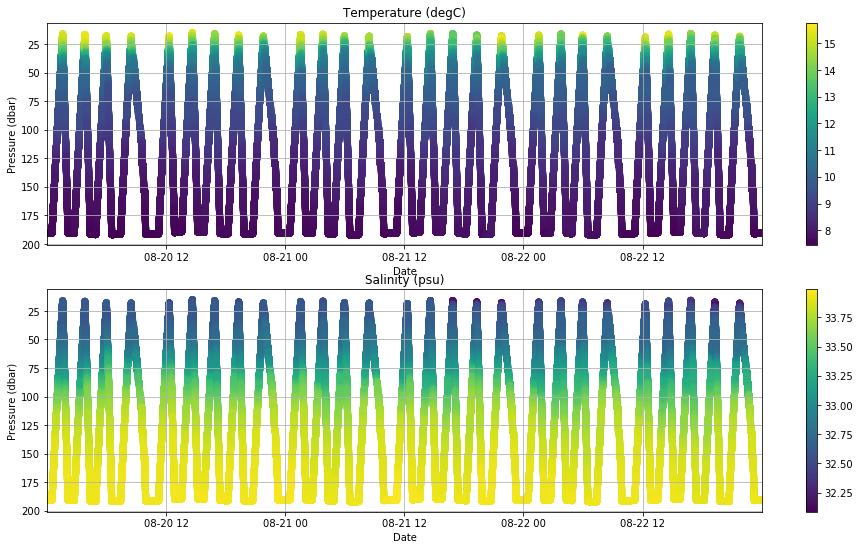

In [20]:
# Now, more complete colored scatter plot, with data plotted
# on a depth vs. time axis.

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(16,9)

# plot temp and salinity curtain plots
ax1.invert_yaxis()
ax1.grid()
ax1.set_xlim(ds_time[0],ds_time[-1])
sc1 = ax1.scatter(ds_time,pressure,c=temperature)
ax1.set_xlabel('Date')
ax1.set_ylabel('Pressure (dbar)')
ax1.set_title('Temperature (degC)')
cb = fig.colorbar(sc1,ax=ax1)

ax2.invert_yaxis()
ax2.grid()
ax2.set_xlim(ds_time[0],ds_time[-1])
ax2.set_xlabel('Date')
ax2.set_ylabel('Pressure (dbar)')
ax2.set_title('Salinity (psu)')
sc2 = ax2.scatter(ds_time,pressure,c=psu)
cb2 = fig.colorbar(sc2,ax=ax2)
plt.show()

/opt/conda/envs/yodapydev/lib/python3.6/site-packages/dask/array/core.py:1260: FutureWarning: The `numpy.shape` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
/opt/conda/envs/yodapydev/lib/python3.6/site-packages/dask/array/core.py:1260: FutureWarning: The `numpy.shape` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,


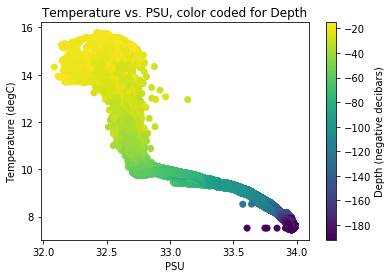

In [21]:
# Now, more complete colored scatter plot, with data plotted
# on a temperature vs. salinty axis, color coded for depth

fig2,(ax3) = plt.subplots(nrows=1,ncols=1)
fig2.set_size_inches(6,4)

sc3 = ax3.scatter(psu,temperature,c=(-1.0*pressure))
ax3.set_title('Temperature vs. PSU, color coded for Depth')
ax3.set_xlabel('PSU')
ax3.set_ylabel('Temperature (degC)')
cb = fig.colorbar(sc3,ax=ax3)
cb.set_label('Depth (negative decibars)')
plt.show()

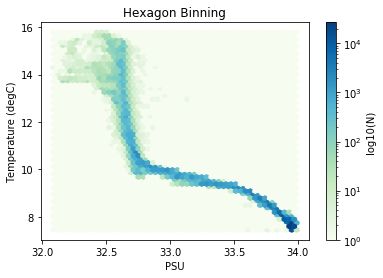

In [22]:
fig3,ax4 = plt.subplots(nrows=1,ncols=1)
fig3.set_size_inches(6,4)

hb = ax4.hexbin(psu,temperature,
                gridsize=50,
                bins='log',
                cmap=plt.cm.GnBu)
ax4.set_title('Hexagon Binning')
ax4.set_xlabel('PSU')
ax4.set_ylabel('Temperature (degC)')
cb = fig3.colorbar(hb, ax=ax4)
cb.set_label('log10(N)')
plt.show()

/opt/conda/envs/yodapydev/lib/python3.6/site-packages/dask/array/core.py:1260: FutureWarning: The `numpy.shape` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,
/opt/conda/envs/yodapydev/lib/python3.6/site-packages/dask/array/core.py:1260: FutureWarning: The `numpy.shape` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,


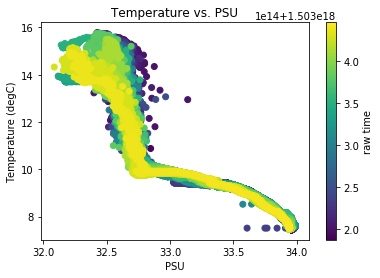

In [23]:
# Now, more complete colored scatter plot, with data plotted
# on a temperature vs. salinty axis, color coded for time (in seconds
# since )

fig2,(ax3) = plt.subplots(nrows=1,ncols=1)
fig2.set_size_inches(6,4)

sc3 = ax3.scatter(psu,temperature,c=(ds.time.data))
ax3.set_title('Temperature vs. PSU')
ax3.set_xlabel('PSU')
ax3.set_ylabel('Temperature (degC)')
cb = fig.colorbar(sc3,ax=ax3)
cb.set_label('raw time')
plt.show()